## A.1 Import libraries

In [1]:
import pandas as pd
import requests
import numpy as np
idx = pd.IndexSlice
import matplotlib.pyplot as plt
import quandl
import datetime
from fredapi import Fred

## A.2 Import api keys from txt file


In [13]:
keys = open('keys.txt').readlines()
keys_quandl = keys[0].rstrip()
keys_fred = keys[1].rstrip()

## A.3 Pass keys to use api
- Note you can simply write in the keys_fred and keys_quandl as a string which you can access after you register for an api on the fred and quandl website

In [14]:
fred = Fred(api_key=keys_fred)
quandl.ApiConfig.api_key = keys_quandl

# 1. Yen

## 1.1 Nominal

In [15]:
df_yen = quandl.get('BOE/XUDLJYD')
df_yen.name = 'Dollar/Yen'
df_yen= df_yen.resample('M').last()
df_yen.index = pd.PeriodIndex(df_yen.index, freq='M')
df_yen.tail(3)

,Value
Date,
2021-10,114.04
2021-11,113.51
2021-12,113.90


## 1.2 Real

In [16]:
df_yen_real = fred.get_series('RBJPBIS')
df_yen_real.index = pd.PeriodIndex(df_yen_real.index, freq='M')
df_yen_real.tail(3)

2021-08    71.08
2021-09    70.86
2021-10    68.71
Freq: M, dtype: float64

## 1.3 Graph

In [17]:
df_yen_final = pd.concat([df_yen, 
           df_yen_real],axis=1)

df_yen_final.columns = ['Dollar/Yen', 'Yen(REER)']
df_yen_final.index = df_yen_final.index.strftime('%b-%y')
df_yen_final.dropna(inplace=True)
df_yen_final.head(3)

,Dollar/Yen,Yen(REER)
Jan-94,108.95,127.55
Feb-94,104.15,132.69
Mar-94,102.80,133.95


<AxesSubplot:>

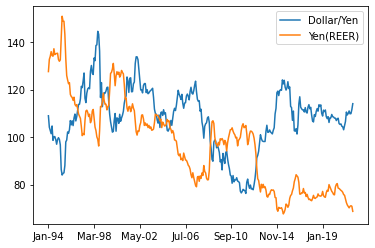

In [18]:
df_yen_final.plot()

# 2. GDP

## 2.1 US

In [19]:
gdp_us = fred.get_series('GDPC1')
gdp_us.tail(2)

2021-04-01    19368.310
2021-07-01    19469.398
dtype: float64

## 2.2 Japan

In [20]:
gdp_jp = fred.get_series('JPNRGDPEXP')
gdp_jp.tail(2)

2021-04-01    537631.0
2021-07-01    532777.9
dtype: float64

## 2.3 Plot

<AxesSubplot:>

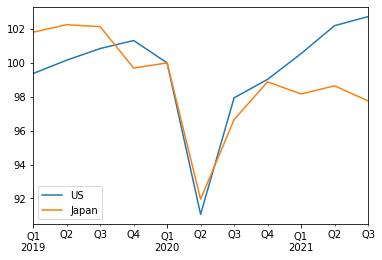

In [21]:
gdp_change = pd.concat([
    gdp_us.apply(lambda x: x/gdp_us['2020-01-01']).multiply(100),
    gdp_jp.apply(lambda x: x/gdp_jp['2020-01-01']).multiply(100)], axis=1)

gdp_change.columns = ['US','Japan']
gdp_change['2019':].plot()

# 3. Bonds-Real yield

## 3.1 Nominal yields

In [22]:
df_jgb = fred.get_series('IRLTLT01JPM156N')
df_jgb.tail(5)

2021-06-01    0.050
2021-07-01    0.015
2021-08-01    0.020
2021-09-01    0.065
2021-10-01    0.095
dtype: float64

In [23]:
df_ust = fred.get_series('IRLTLT01USM156N')
df_ust.tail(5)

2021-06-01    1.52
2021-07-01    1.32
2021-08-01    1.28
2021-09-01    1.37
2021-10-01    1.58
dtype: float64

<AxesSubplot:>

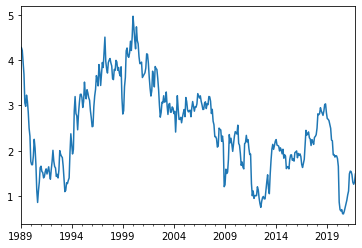

In [24]:
df_diff = df_ust - df_jgb
df_diff.dropna(inplace=True)
df_diff.index = pd.PeriodIndex(df_diff.index, freq='M')
df_diff.plot()

## 3.2 Real yields

### 3.2.1 CPI

In [25]:
df_cpi_jp = fred.get_series('CPALTT01JPM659N')
df_cpi_jp.dropna(inplace=True)
df_cpi_jp.head(2)

1960-01-01    3.239289
1960-02-01    3.777545
dtype: float64

In [26]:
df_cpi_us = fred.get_series('CPALTT01USM659N')
df_cpi_us.dropna(inplace=True)
df_cpi_us.tail(2)

2021-08-01    5.251272
2021-09-01    5.390349
dtype: float64

### 3.2.2 Calculate real yield: Subtract 3.2.1 from 3.1 

In [27]:
#df_jgb_real = df_jgb.subtract(df_cpi.Japan).dropna()
df_jgb_real = df_jgb.subtract(df_cpi_jp).dropna()
df_ust_real = df_ust.subtract(df_cpi_us).dropna()

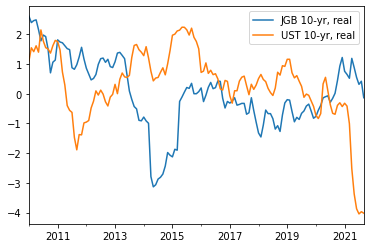

In [28]:
ax = df_jgb_real['2010':].plot(label = 'JGB 10-yr, real')
df_ust_real['2010':].plot(label = 'UST 10-yr, real')
plt.legend()